# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    value = (x**2)*(numpy.sin(x))
    print(value)
    return value

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

[0.         0.00099833 0.00794677 0.02659682 0.06230693 0.11985638
 0.20327129 0.31566667 0.4591079  0.6344948 ]


Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    value2 = (2*x)*(numpy.sin(x))-(x**2-2)*(numpy.cos(x)) - 2
    print(value2)
    return value2


Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

0.0


In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

[0.00000000e+00 2.49722326e-05 3.98224887e-04 2.00481823e-03
 6.28690281e-03 1.51950219e-02 3.11213765e-02 5.68164649e-02
 9.52908702e-02 1.49704300e-01]


Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    value3 = g(xmax) - g(xmin)
    print(value3)
    return value3

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

1.0965907296271418
0.0
1.0965907296271418


## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [9]:
def integrate_numeric(xmin, xmax, N):
    h = (xmax-xmin)/N
    k = h/2
    
    total_first = 0
    total_second = 0
    
    for i in range (0,N):
        total_first = total_first + 4*f(xmin + (2*i + 1)*k)
        print(total_first)
    
    for i in range (0,N-1):
        total_second = total_second + 2*f(xmin + 2*(i + 1)*k)
        print(total_second)
   
    answer = (h/6)*(f(xmin)+ f(xmax)+ total_first + total_second)
    print(answer)
    return answer




Make sure you have implemented Simpson's rule correctly:

In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

3.637189707302727
14.548758829210907
0.0
-12.108839924926851
1.6266126028560373


In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

6.398293469861466e-05
0.00025593173879445865
0.0017238557849604387
0.007151354878636214
0.00794677323180245
0.03893844780584601
0.021666282847426523
0.1256035791955521
0.04565474063245165
0.3082225417253587
0.08246188043677752
0.6380700634724688
0.13435638927294644
1.1754956205642544
0.20327129042221273
1.9885807822531052
0.29075389430613996
3.151596359477665
0.39792102669585444
4.743280466261083
0.5254201854514382
6.844961208066835
0.6733972111987803
9.538550052861957
0.8414709848078965
12.904433992093544
1.028715585950603
17.019296335895955
1.2336502631632893
21.953897388549112
1.454237477553611
27.770847298763556
1.6878891904460656
34.52240406054782
1.9314814707773824
42.24832994365735
2.1813774018752468
50.97383955115834
2.433458170351646
60.707672232564924
2.68316212319605
71.44032072534912
2.9255314837483084
83.14244666034236
3.1552663240453525
95.76351195652377
3.366785301033527
109.23065316065788
3.554292578259827
123.44782347369718
3.7118502738075843
138.29522456892752
3.83345

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


2.469483380397012
0.0
2.469483380397012
0.015462747453407684
0.061850989813630734
0.38342180251312546
1.5955381998661327
1.4827884677431034
7.526692070838546
3.013456962301432
19.580519920044274
0.11985638465105075
0.2397127693021015
0.8414709848078965
1.9226547389178945
2.2443637198591224
6.411382178636139
0.0
3.637189707302727
2.4690909838319284
0.0019480427091441827
0.007792170836576731
0.051507074402725436
0.21382046844747848
0.22855362224236805
1.1280349574169506
0.5876504938994582
3.4786369330147835
1.1419324237816673
8.046366628141453
1.8545009359344036
15.464370371879067
2.6367468211129927
26.011357656331036
3.3542078259715797
39.428188960217355
0.015462747453407684
0.030925494906815367
0.11985638465105075
0.27063826420891685
0.38342180251312546
1.0374818692351677
0.8414709848078965
2.7204238388509605
1.4827884677431034
5.686000774337167
2.2443637198591224
10.174728214055412
3.013456962301432
16.201642138658276
0.0
3.637189707302727
2.469459200257431
0.00024398171032179766
0.00

1.1069612450442587
341.5448249179797
1.1169027697043088
346.01243599679697
1.12688460462454
350.5199744152951
1.1369065147893582
355.06760047445255
1.1469682620219375
359.6554735225403
1.1570696049859928
364.2837519424843
1.1672102991876645
368.9525931392349
1.177390096977517
373.662153527145
1.1876087475526496
378.4125885173556
1.197865996958919
383.20405250519127
1.208161588093277
388.0366988575644
1.2184952607062198
392.91067990038925
1.228866751404351
397.82614690600667
1.2392757936530552
402.78325008061887
1.2497221177792899
407.782138551736
1.2602054509744844
412.82296035563394
1.2707255172975556
417.90586242482414
1.2812820376780358
423.0309905755363
1.2918747299193147
428.19848949521355
1.3025033087019915
433.4085027300215
1.313167485587344
438.66117267237087
1.3238669690209082
443.9566405484545
1.3346014643361719
449.2950464057992
1.3453706737583813
454.67652910083274
1.356174296408461
460.10122628646656
1.3670120283070473
465.56927439969473
1.377883562378633
471.0808086492092

33.08097260965546
0.12609896997146736
33.58536848954133
0.12751366907238953
34.09542316583089
0.1289384099142512
34.611176805487894
0.13037321857143594
35.132669679773635
0.1318181209825348
35.659942163703775
0.1332731429499296
36.193034735503495
0.1347383101393771
36.731987976061006
0.13621364807959457
37.27684256837939
0.13769918216184623
37.82763929702677
0.1391949376395309
38.38441904758489
0.14070093962777083
38.94722280609597
0.14221721310300164
39.51609165850798
0.14374378290256326
40.091066790118234
0.14528067372429224
40.6721894850154
0.14682791012611496
41.25950112551986
0.14838551652564216
41.85304319162243
0.14995351719976455
42.45285726042149
0.15153193628424955
43.05898500555848
0.15312079777333917
43.67146819665184
0.15472012551934913
44.29034869872923
0.15632994323226904
44.91566847165831
0.15795027447936386
45.54746956957576
0.1595811426847764
46.18579414031487
0.1612225711291311
46.8306844248314
0.16287458294913887
47.48218275662795
0.1645372011372031
48.1403315611767

0.09450115308334468
11.380073938078398
0.09567834118560824
11.571430620449615
0.09686489095901636
11.765160402367647
0.09806083167167201
11.961282065710991
0.09926619246643442
12.15981445064386
0.10048100236047627
12.360776455364814
0.10170529024484179
12.564187035854497
0.10293908488400588
12.770065205622508
0.10418241491543437
12.978430035453377
0.10543530884914519
13.189300653151667
0.10669779506727059
13.402696243286208
0.1079699018236205
13.61863604693345
0.10925165724324681
13.837139361419943
0.1105430893220088
14.058225540063962
0.11184422592613959
14.281913991916241
0.11315509479181352
14.508224181499868
0.1144757235247148
14.737175628549297
0.11580613959960713
14.968787907748512
0.11714637035990433
15.20308064846832
0.11849644301724208
15.440073534502805
0.11985638465105075
15.679786303804907
0.12122622220812937
15.922238748221165
0.12260598250222048
16.167450713225605
0.12399569221358628
16.41544209765278
0.12539537788858576
16.66623285342995
0.12680506593925295
16.9198429853

Text(0,0.5,'Fractional Error')

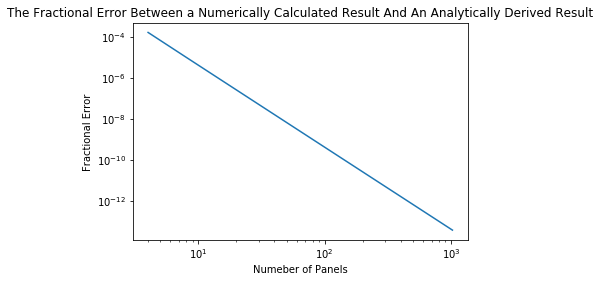

In [16]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

def result_numeric(x0, x1, h):
    answer = []
    for i in h:
        answer.append(integrate_numeric(x0,x1,i))
    return answer

error = 1 - ((result_numeric(x0, x1, panel_counts))/(result_analytic))

plt.loglog(panel_counts, error)
plt.title('The Fractional Error Between a Numerically Calculated Result And An Analytically Derived Result')
plt.xlabel('Numeber of Panels')
plt.ylabel('Fractional Error')
    

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

When the number of panels increases the fractional error decreases and thus the method becomes more accurate. However, when the number of panels is too high the change in fractional error becomes negligible, if the function is not smooth though, the error would increase. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Like the Simpson's rule increasing the number of panels would increase the accuracy. However, if the function is not smooth then increasing the number of panels would just increase the fractional error.